## Customer Spending Analysis for Wholesale Business Optimization

#### Developed by *Vaishnavi Chakradeo*

## 1. Introduction
#### Source Information: 
**Repository:** UC Irvine Machine Learning Repository  
**Dataset Name:** [Wholesale Customers Dataset](https://archive.ics.uci.edu/dataset/292/wholesale+customers)  
**Domain:** Business
####
#### Data Description:
The dataset has information about the annual spending of clients in a wholesale distribution business across various product categories. It is a multivariate dataset with 6 integer features and 2 categorical features. There are 440 instances and no missing values. The dataset can be used for clustering and classifcation tasks. The data dictionary is as follows:

| **Variable Name**     | **Role**   | **Type**       | **Description**                                         | **Units** |
|------------------------|------------|----------------|---------------------------------------------------------|------------|
| **Channel**            | Feature    | Categorical    | Customer channel (Horeca or Retail)                      | —          |
| **Region**             | Target     | Categorical    | Customer region (Lisbon, Oporto, Other)                  | —          |
| **Fresh**              | Feature    | Integer        | Annual spending on fresh products                        | m.u.       |
| **Milk**               | Feature    | Integer        | Annual spending on milk products                         | m.u.       |
| **Grocery**            | Feature    | Integer        | Annual spending on grocery products                      | m.u.       |
| **Frozen**             | Feature    | Integer        | Annual spending on frozen products                       | m.u.       |
| **Detergents_Paper**   | Feature    | Integer        | Annual spending on detergents and paper products         | m.u.       |
| **Delicatessen**       | Feature    | Integer        | Annual spending on delicatessen products                 | m.u.       |

####
#### Class Distribution: Region

| Region | Count |
|--------|-------|
| Lisbon | 77    |
| Oporto | 47    |
| Other  | 316   |

####
#### Class Distribution: Channel

| Channel | Count |
|---------|-------|
| Horeca  | 298   |
| Retail  | 142   |

####
#### Research Objective and Goals:
The main goal of studying this dataset is to understand the annual spending of clients across diffrent product categories. This can be used to understand customer purchasing behaviour, and segment customers for business strategy optimization. This will also aid in targetted marketting and optimizing inventory.


The reasons that I am interested in the dataset are:  
**Inventory Management:** This data about annual spending across different product categories can help in better planning inventory.  
**Market Segmentation:** The spending patterns help in finding distinct client groups.  
**Targeted Marketing:** This data can help us in planning for personalized product recommendations.

The three research questions that I have identified are:

**What is the category-wise spending for the retail and horeca channels?**
This question is interesting as it can tell us which product categories are important to each channel which can be helpful in targetted marketing, and better planning the inventory.

**What is the category-wise spending across the different regions?**
This question is interesting as it will help us understand regional buying patterns. This can be helpful in better serving the local or regional demands.

**What is the average annual spending for each category?**
The average annual spending across each category can help us understand which product categories are more successful, there by helping in market segmentation and better planning for marketing and inventory.


## 2. Data Analysis

### 2-1. Importing the libraries necessary for your EDA

In [4]:
# Import your data easy to read
import pandas as pd

# importing data from excel
df = pd.read_excel("Wholesale customers data.xlsx")

# printing the first five rows
print(df.head(5))

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


### 2-2. Import libraries for EDA

In [6]:
# Import libraries for EDA
import seaborn as sns
import matplotlib.pyplot as plt

### 2-3. Review Data

In [8]:
# 1. Check data dimension by using .shape
print("The number of rows and columns in the dataset are:", df.shape)

The number of rows and columns in the dataset are: (440, 8)


In [9]:
# 2. Check types of data by .info() ; .dtype
print("Information Summary\n")
print(df.info())

print("\n-----------------------------------------------------------------")
print("\nColumn Datatypes\n")
print(df.dtypes)

# Note: One will notice that the the datatype for the 'Channel' and 'Region' columns is an integer. 
# However, these two are categorical attributes.
# These attributes have been one-hot encoded and hence, the values in these columns are integers.

# Changing the one-hot encoded values to the original ones
# in order to do that we have one data point i.e., count of rows for each region and count of rows for each channel
# when the data was checked for the counts, '1' corresponded to 'horeca' and 2 to 'retail' for the 'channel' attribute
# Likewise '1' corresponded to 'Lisbon', '2' to 'Oporto' and '3' to 'Other' for the 'Region' attribute

# mapping the numerical values to region and channel respectively
region_mapping = {1: 'Lisbon', 2: 'Oporto', 3: 'Other'}
channel_mapping = {1: 'Horeca', 2: 'Retail'}

#Applying the mappings to replace encoded values with the names, only if keys of the mappings defined above
# match the unique values for both the attributes
# Check if unique values match the mapping keys
if set(df['Region'].unique()) == set(region_mapping.keys()):
    df['Region'] = df['Region'].map(region_mapping)

if set(df['Channel'].unique()) == set(channel_mapping.keys()):
    df['Channel'] = df['Channel'].map(channel_mapping)

# print the modified dataset
print("\n-----------------------------------------------------------------\n")
print("The dataset after replacing the numerical values for the categorical attributes with the actual categories looks liks:")
print(df.head())

# printing the information summary and column datatypes again
print("\n-----------------------------------------------------------------\n")
print("Information Summary\n")
print(df.info())

print("\n-----------------------------------------------------------------")
print("\nColumn Datatypes\n")
print(df.dtypes)


Information Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None

-----------------------------------------------------------------

Column Datatypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

-----------------------------------------------------------------

The d

In [10]:
# 3. For quantitative variable, generate a table for the count, mean, standard deviation, minimum and maximum values and the quantities of the data
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 2-4. Generate Sub-dataset

In [12]:
# 1. Make sub-dataset(s) from your original dataset for your research objective, goals by dropping unnecessary variables
print("No separate sub-datasets have been made for my research questions, as all the questions require all attributes.")
print("The numerical one-hot encoded values for the categorical attributes were however replaced with the actual values as shown in 2.3")

No separate sub-datasets have been made for my research questions, as all the questions require all attributes.
The numerical one-hot encoded values for the categorical attributes were however replaced with the actual values as shown in 2.3


In [13]:
# 2. try to change variable names
df.rename(columns={
    'Delicassen': 'Delicate_Essentials'
}, inplace=True)

print("The dataframe after changing the name of 'Delicassen' to 'Delicate_Essentials' is as follows:\n\n")
print(df.head())

The dataframe after changing the name of 'Delicassen' to 'Delicate_Essentials' is as follows:


  Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0  Retail  Other  12669  9656     7561     214              2674   
1  Retail  Other   7057  9810     9568    1762              3293   
2  Retail  Other   6353  8808     7684    2405              3516   
3  Horeca  Other  13265  1196     4221    6404               507   
4  Retail  Other  22615  5410     7198    3915              1777   

   Delicate_Essentials  
0                 1338  
1                 1776  
2                 7844  
3                 1788  
4                 5185  


In [14]:
# 3. check if there are missing values
# as per the information summary given in section 2-3, there are no missing values
if df.isnull().values.any():
    print("Missing values are present in the dataset")
else:
    print("There are no missing values present")

# If there is a null value in 'Region' or 'Channel' attributes or both,
#then such rows should be deleted

# for all the other attributes, the missing values must be replaced by 0
#as all the values in the other attributes are in monetory units

df = df.dropna(subset=['Region', 'Channel'])
df.fillna(0, inplace=True)

There are no missing values present


In [15]:
# 4. Check if there are duplicated values
duplicates = df.duplicated().sum()
print("There are {0} duplicate values in the dataset.".format(duplicates))

#removing duplicates
df = df.drop_duplicates()

There are 0 duplicate values in the dataset.


### 2-5. Checking Outliers

Detecting outliers in the spending patterns can be useful as it will give insights into customer behavior and market dynamics. Analyzing the product spending across each group of channel and region can help us in understanding popular product categories per region and channel. It can help in inventory optimization, designing targetted marketing campaigns, and creating loyalty programs for high-spending segments. So, in this case removing the outliers will do more harm than good, as it can affect corporate strategy development.

In order to visualize the outliers, I will be using boxplots. they help in highlighting outliers as points that lie outside of the whiskers, i.e., upper and lower limits.

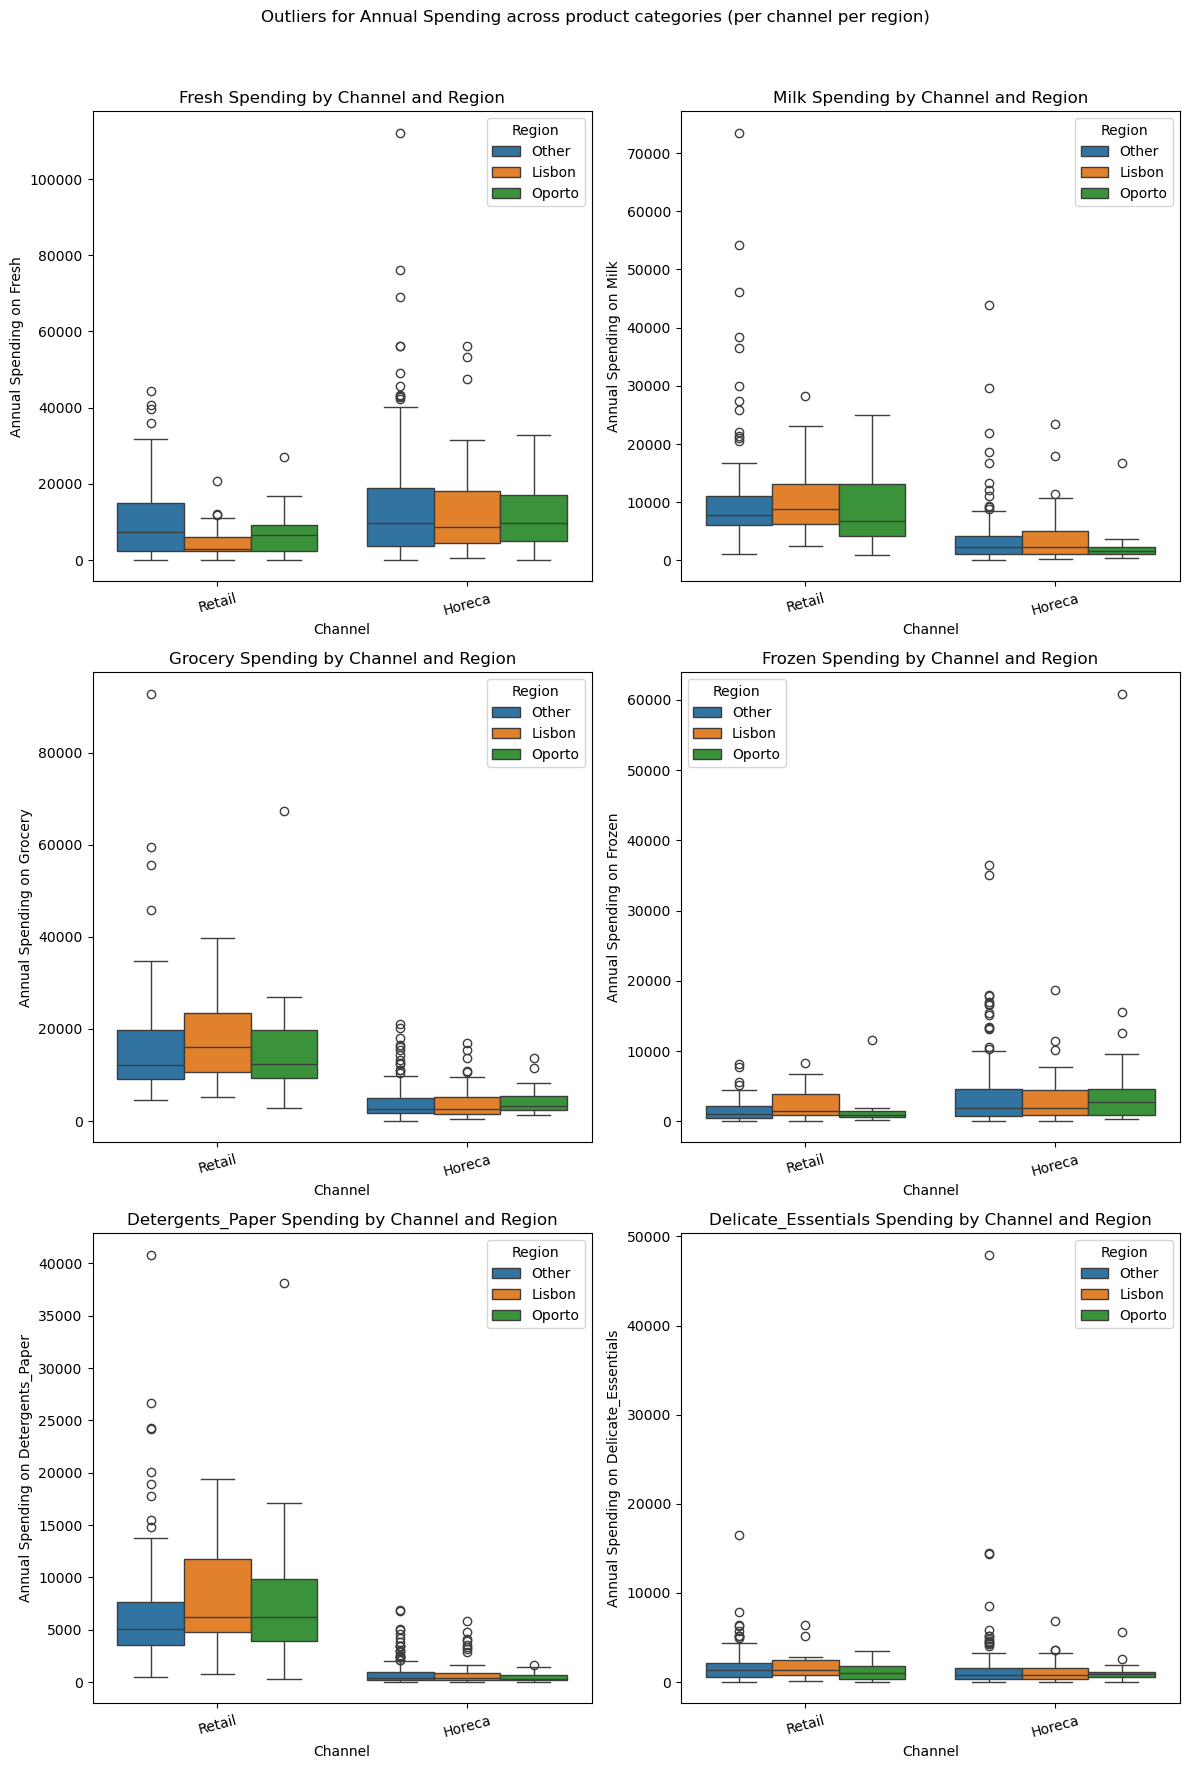

In [18]:
products = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicate_Essentials']

num_products = len(products)

# the number of rows will be number of products by two
rows = (num_products + 1) // 2

# the number of columns will be 2. We are doing this pretty print the plots in a nice grid for better visualization
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))
fig.suptitle('Outliers for Annual Spending across product categories (per channel per region)')
axes = axes.flatten()

for i in range(num_products):
    sns.boxplot(x='Channel', y=products[i], hue='Region', data=df, ax=axes[i])
    axes[i].set_title('{0} Spending by Channel and Region'.format(products[i]))
    axes[i].set_xlabel('Channel')
    axes[i].set_ylabel('Annual Spending on {0}'.format(products[i]))
    axes[i].tick_params(axis='x', rotation=15)
    axes[i].legend(title='Region')

# Hiding any unused subplots
for i in range(len(products), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Observations:

Certain insights can be derived from the above plot. Let's look at them category-wise:

**Fresh Spending:**  
- It can be seen that the boxes for Horeca channel are wide, indicating wide spending variablity. This can make inventory planning difficult.
- Retail category also has outliers, possibly because retailers are stocking up on fresh produce.
- The number of outliers are more in the 'other' region for both the channels, indicating bulk buyers in regions classified under 'other'.

**Milk Spending:**  
- Here again, the 'other' region has more number of outliers for both the channels.

**Grocery Spending:**  
- Spending variability for the retail channel is greater.
- The median spending for the retail channel is significantly greater than that of horeca.
- There are greater number of outliers for the 'other' and 'Lisbon' region for horeca.

**Frozen Spending:**  
- As compared to the other categories, the spending on this one is significantly less.
- 'Retail' has shorter boxes, indicating consistent spending on this categrory by retailers
- The number of outliers for the 'horeca' channel are more, may be because retsaurants and caterers are stocking up on frozen items.

**Detergents_Paper Spending:** 
- The spending by horeca clients is very less for this product category. It is also consistent.
- Retailers are spending a lot on this category.
- There are a lot of outliers for the 'other' region across both the channels.
- Outliers can also be seen for the Lisbon region for the horeca clients.

**Delicate_Essentials:**  
- The spending for this category is the lowest amongst all the other categories.
- Again, a large number of outliers can be seen for the 'other' region across both the channels.

### 2-6. Generating Plot(s)

#### Inventory Management
**Goal:** Plan inventory based on spending variability and outliers.  
**Plot:** Boxplots for spending by category

The plots used in section 2.5 can help the wholesale distribution business to better plan for inventory

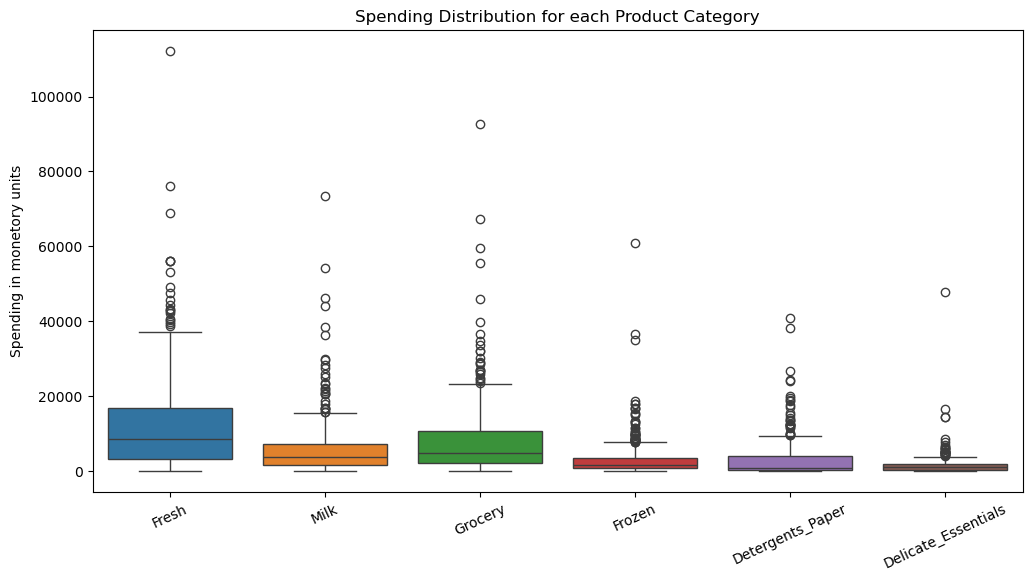

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(['Region', 'Channel'], axis=1))
plt.title('Spending Distribution for each Product Category')
plt.xticks(rotation=25)
plt.ylabel('Spending in monetory units')
plt.show()

As can be seen from the above graph, outliers are present across all the product categories. In order to better plan for the inventory, the insights gathered from section 2-5 can help in a better way.

#### Market Segmentation
**Goal:** Segmenting the market, i.e., detecting distinct client groups  
**Plot:** Pair plots to visualize natural groupings.

Pair plots can be used to analyze relationships amongst numerical variables in a dataset. It is useful to find out patterns, correlation between different numerical attributes, and potential clusters in a dataset. 

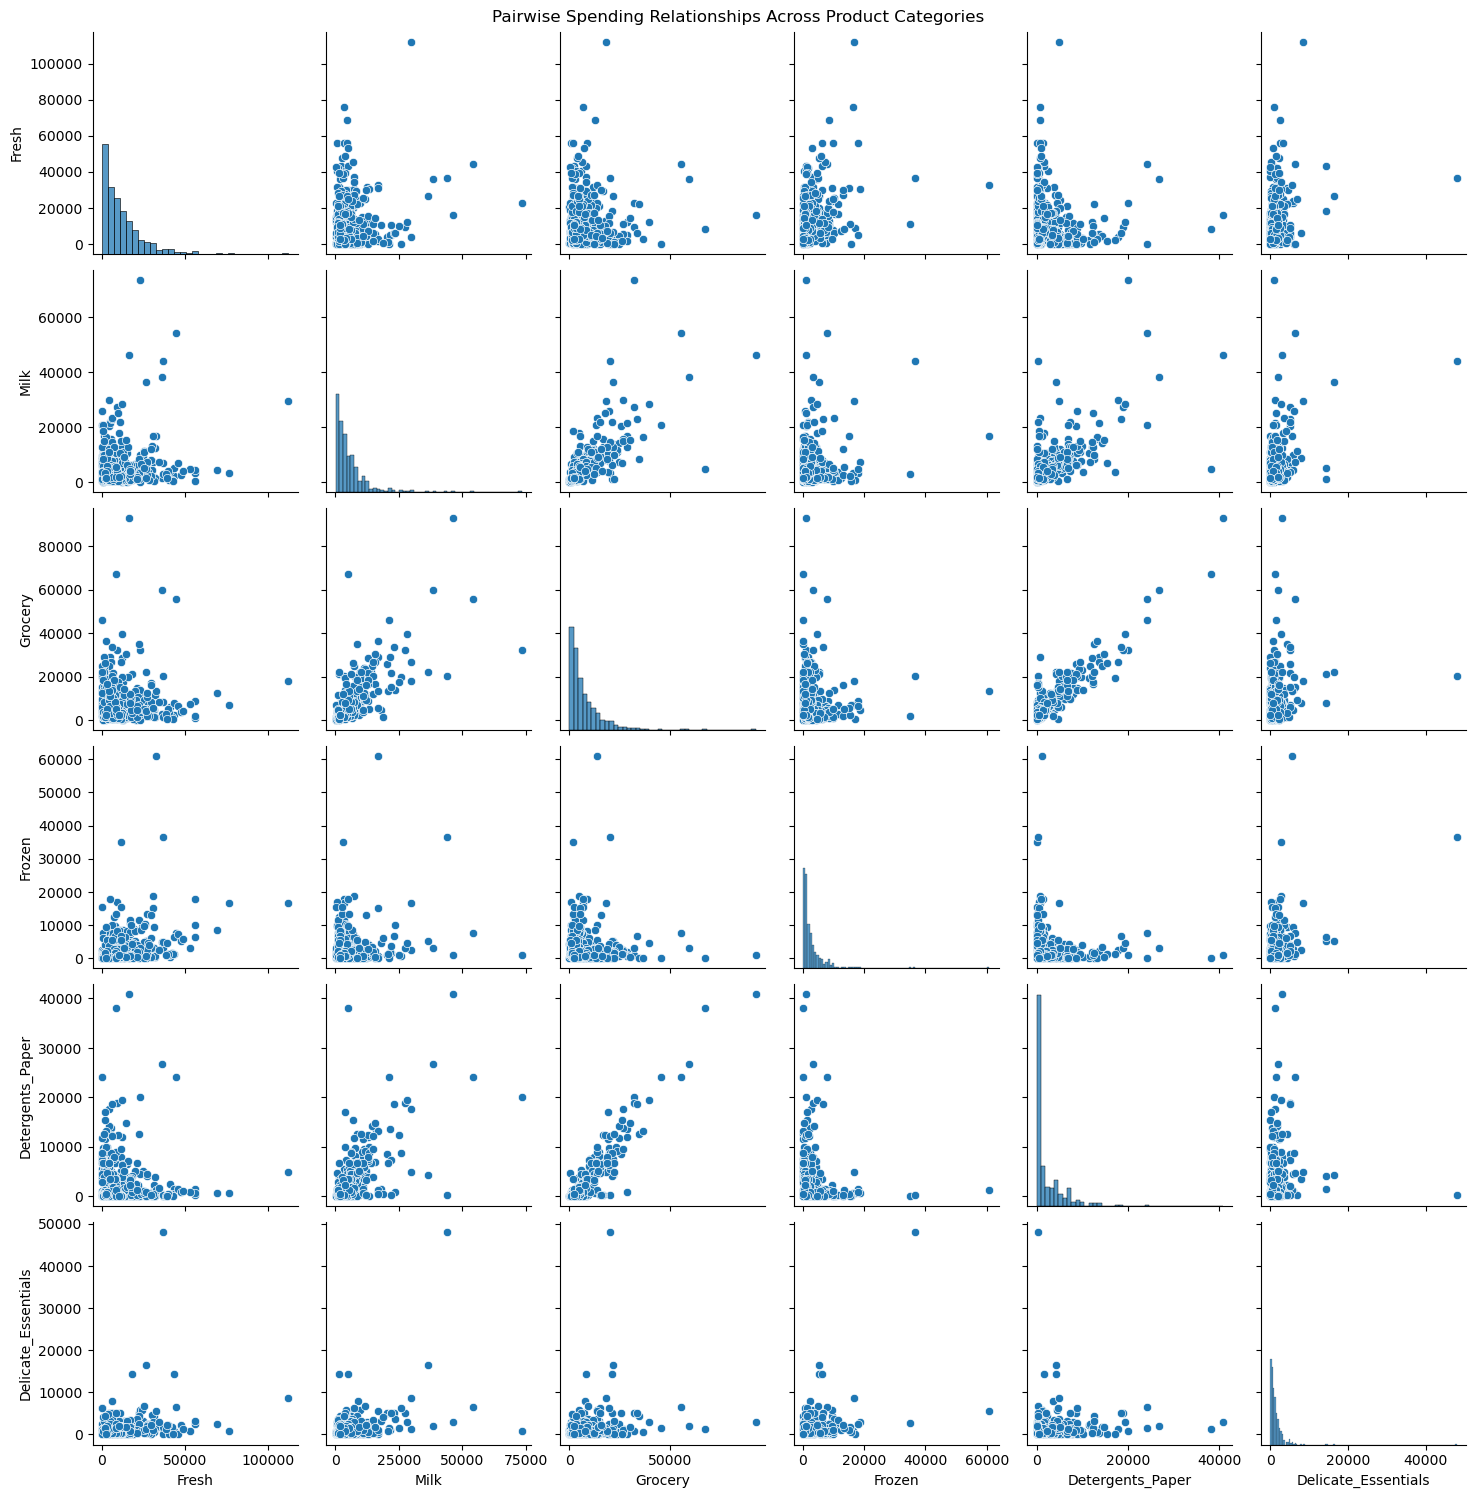

In [25]:
sns.pairplot(df.drop(['Region', 'Channel'], axis=1))
plt.suptitle('Pairwise Spending Relationships Across Product Categories', y=1)
plt.show()

As can be seen from the above plot:
- Majority of the customers are small or medium spenders, with some being high-spenders as indicated by the outliers. The plot generated in section 2.5 can be used to corroborate on this.
- Certain categories have weak correlations, i.e., clients are not buying these categories together. However, certain product categories have positive corelation with one other, for example, 'Grocery and Milk', 'Grocery and Detergents_Paper'.
- The business has both, low to mid-range spenders and high spending clients as well, across all the product categories.
- We can apply clustering algortihms, to separate bulk buyer segment and regular buyer segment.

#### Targeted Marketing
**Goal:** Understand which categories result in most spending for different customer segments.  
**Plot:** Bar plot of average spending per category by channel

<Figure size 1200x600 with 0 Axes>

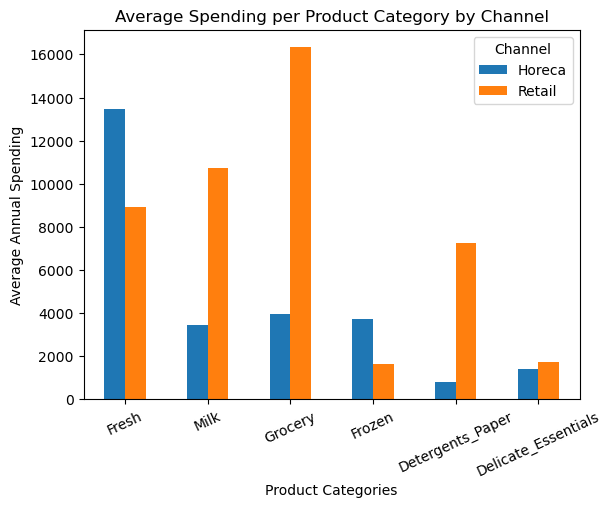

In [28]:
plt.figure(figsize=(12, 6))
df.groupby('Channel').mean(numeric_only=True).T.plot(kind='bar')
plt.title('Average Spending per Product Category by Channel')
plt.xlabel('Product Categories')
plt.ylabel('Average Annual Spending')
plt.xticks(rotation=25)
plt.legend(title='Channel')
plt.show()

As can be seen from the above plot
- The spending of Horeca clients on Fesh products is significantly more as compared to Retail clients.
- Likewise, Retailers spend more on 'Milk', 'Grocery' and 'Detergents_Paper' categories as compared to Horeca clients.
- The spending on Delicate_Essentials is less across all the product categories.

## 3. EDA

#### Descriptive Statistics for Numeric Columns

In [32]:
statistics = df[products].describe().T
statistics['range'] = statistics['max'] - statistics['min']
statistics['sum'] = df[products].sum()
print(statistics)

                     count          mean           std   min      25%     50%  \
Fresh                440.0  12000.297727  12647.328865   3.0  3127.75  8504.0   
Milk                 440.0   5796.265909   7380.377175  55.0  1533.00  3627.0   
Grocery              440.0   7951.277273   9503.162829   3.0  2153.00  4755.5   
Frozen               440.0   3071.931818   4854.673333  25.0   742.25  1526.0   
Detergents_Paper     440.0   2881.493182   4767.854448   3.0   256.75   816.5   
Delicate_Essentials  440.0   1524.870455   2820.105937   3.0   408.25   965.5   

                          75%       max     range      sum  
Fresh                16933.75  112151.0  112148.0  5280131  
Milk                  7190.25   73498.0   73443.0  2550357  
Grocery              10655.75   92780.0   92777.0  3498562  
Frozen                3554.25   60869.0   60844.0  1351650  
Detergents_Paper      3922.00   40827.0   40824.0  1267857  
Delicate_Essentials   1820.25   47943.0   47940.0   670943  


#### Visualizing Distributions (Histograms & Boxplots)

Here, histograms can be used to visualize overall spending distribution, highlighting common spending ranges of customers for each product category. It will help the Wholesale distribution business to categorize clients based on the amount of spending, i.e., low spending clients, high spending segment and so on. Boxplots as indicated above can be useful in visualizing outliers.

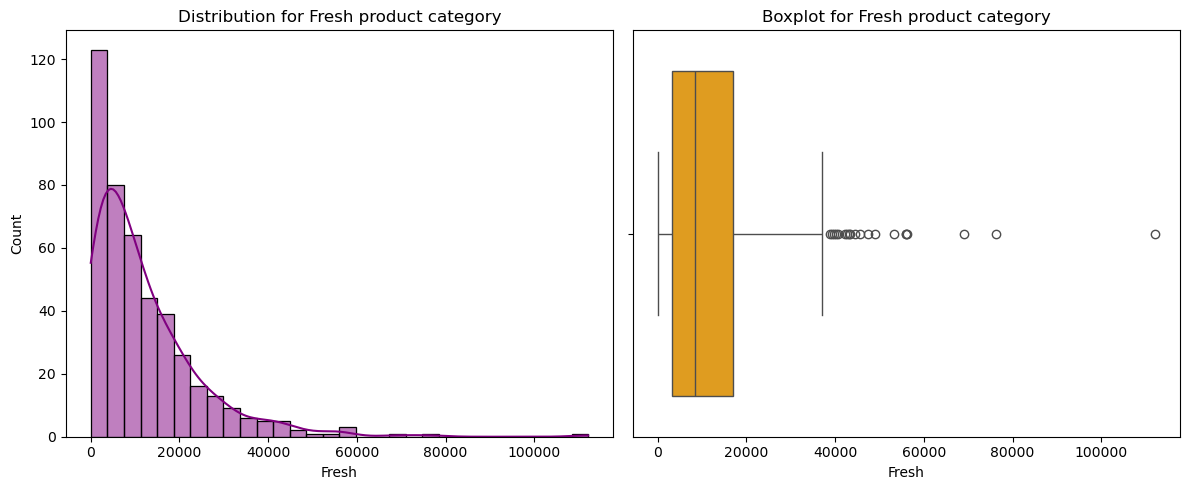

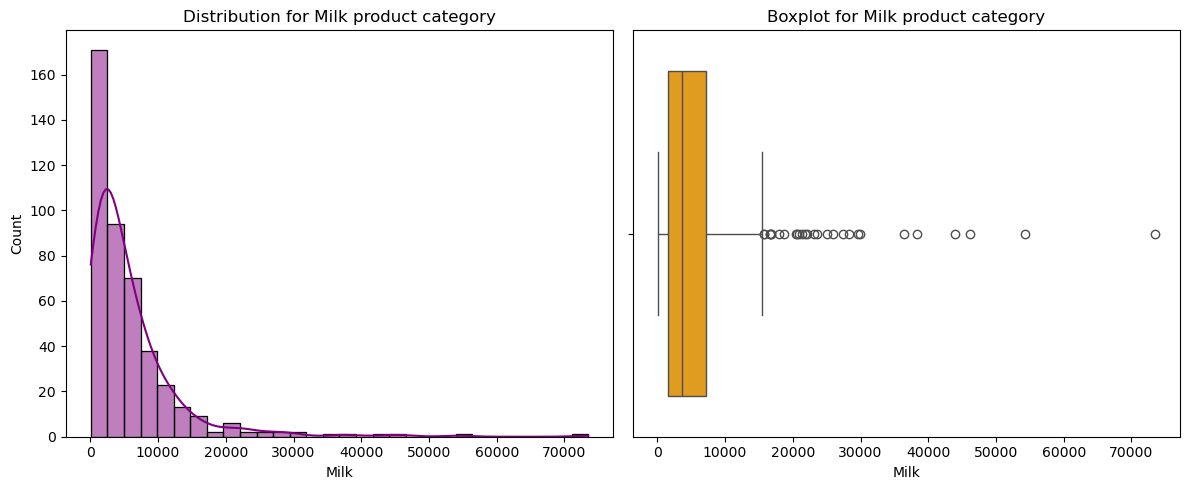

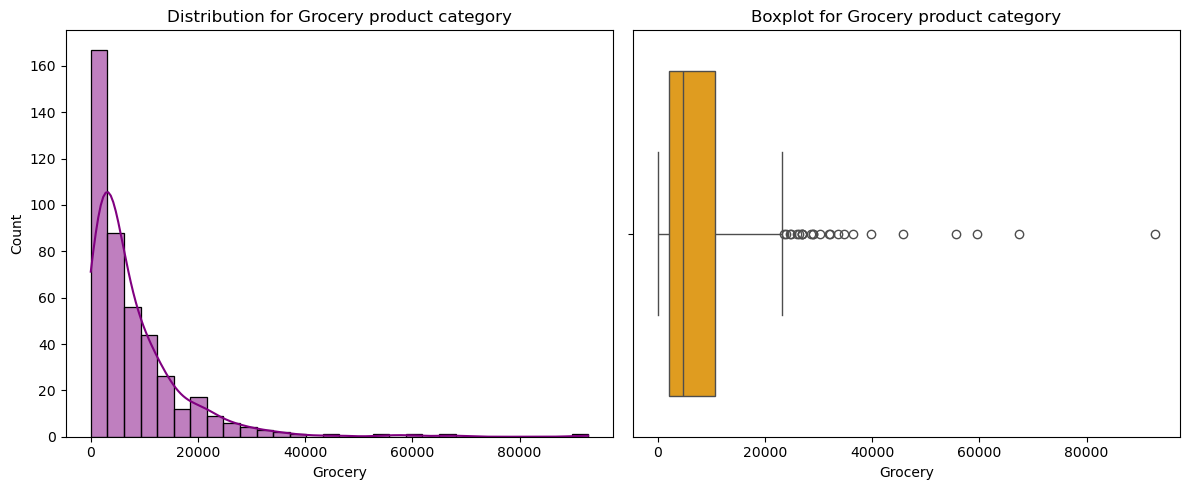

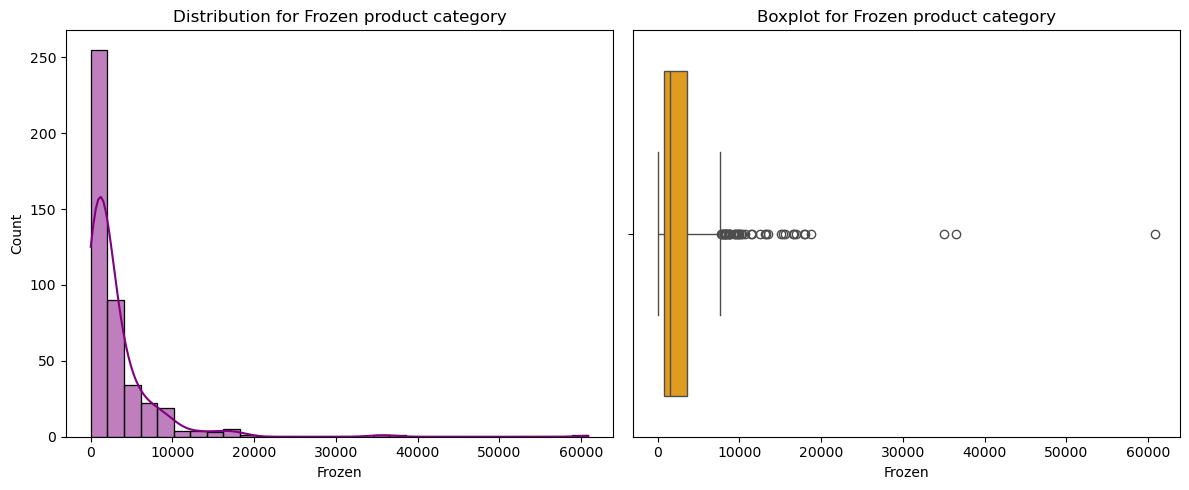

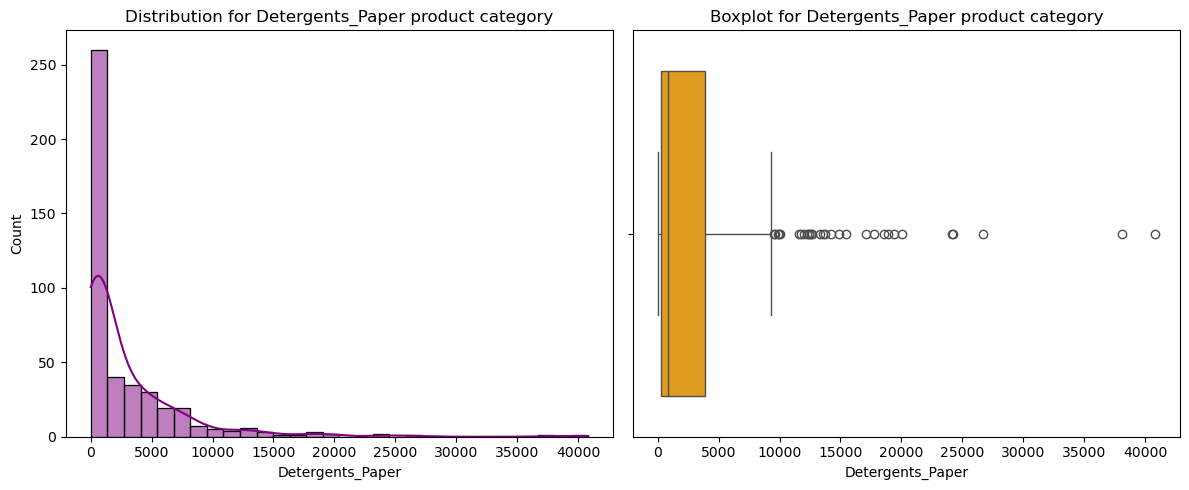

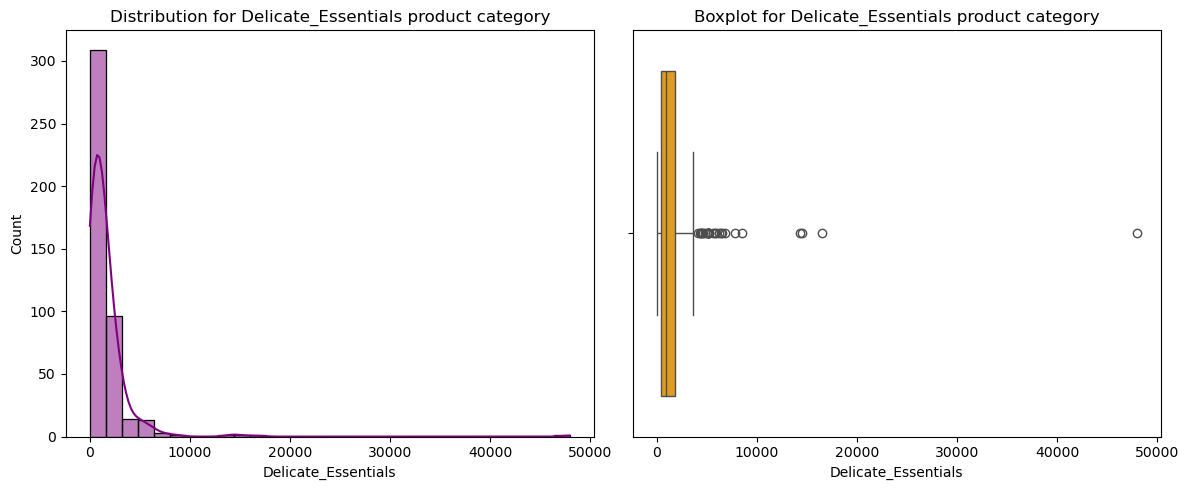

In [34]:
# histograms and boxplots for each product category is being plotted here
for product in products:
    plt.figure(figsize=(12, 5))
        
    # plotting histogram for a product category
    plt.subplot(1, 2, 1)
    sns.histplot(df[product], bins=30, kde=True, color='purple')
    plt.title('Distribution for {0} product category'.format(product))
        
    # plotting boxplot for a product category
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[product], color='orange')
    plt.title('Boxplot for {0} product category'.format(product))
        
    plt.tight_layout()
    plt.show()

As can be seen from the above plot:
- The graphs are pretty-much left skewed, i.e., most customers fall under the low to medium spending range.
- The spending variability for milk, grocery, and fresh product categories is high. It indicates diverse purchasing behaviours.
- Outliers can be seen across all the product categories, particularly detergents-paper, milk, fresh and grocery categories.
- The median spending for frozen and delicate essentials categories is significantly low as compared to other product categories.

#### Exploring Relationships (Correlation & Heatmap)

A correlation heatmap can help in visualizing relationships between product categories. This helps in market basket analysis, and inventory planning. It will also help the Wholesale distribution business to plan for targetted promotions to increase sales.

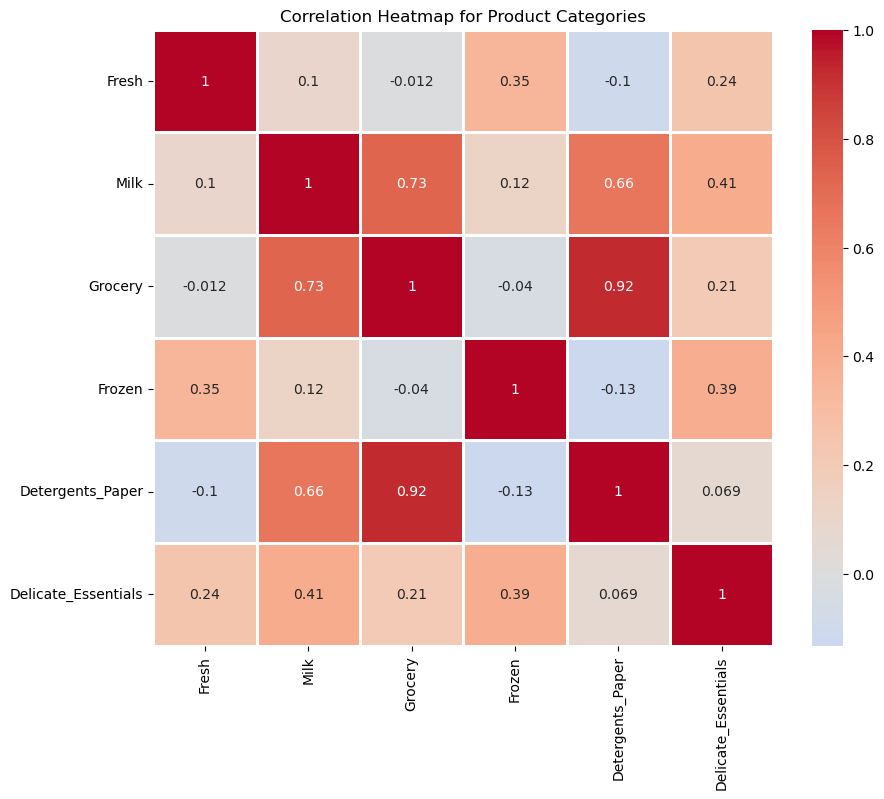

In [37]:
correlation_matrix = df[products].corr()
    
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=1)
plt.title('Correlation Heatmap for Product Categories')
plt.show()

As can be seen from the above plot:
- The grocery and detergents_paper category has the highest correltation coefficient, indicating that clients who buy groceries, also mostly buy detergents and paper products.
- Milk and Grocery categories, Milk and Detergents_Paper categories also have a high corelation coefficient.
- Apart from the above observations, the correlation of Delicate_Essentails, Detergents_Papers, and Frozen products is weak with most other product categories.

#### Scatter Plots

Scatter plots serve a similar purpose as the pairwise plots plotted in section 2.6. The insights derived from the pairwise plots are the same that can be derived here.

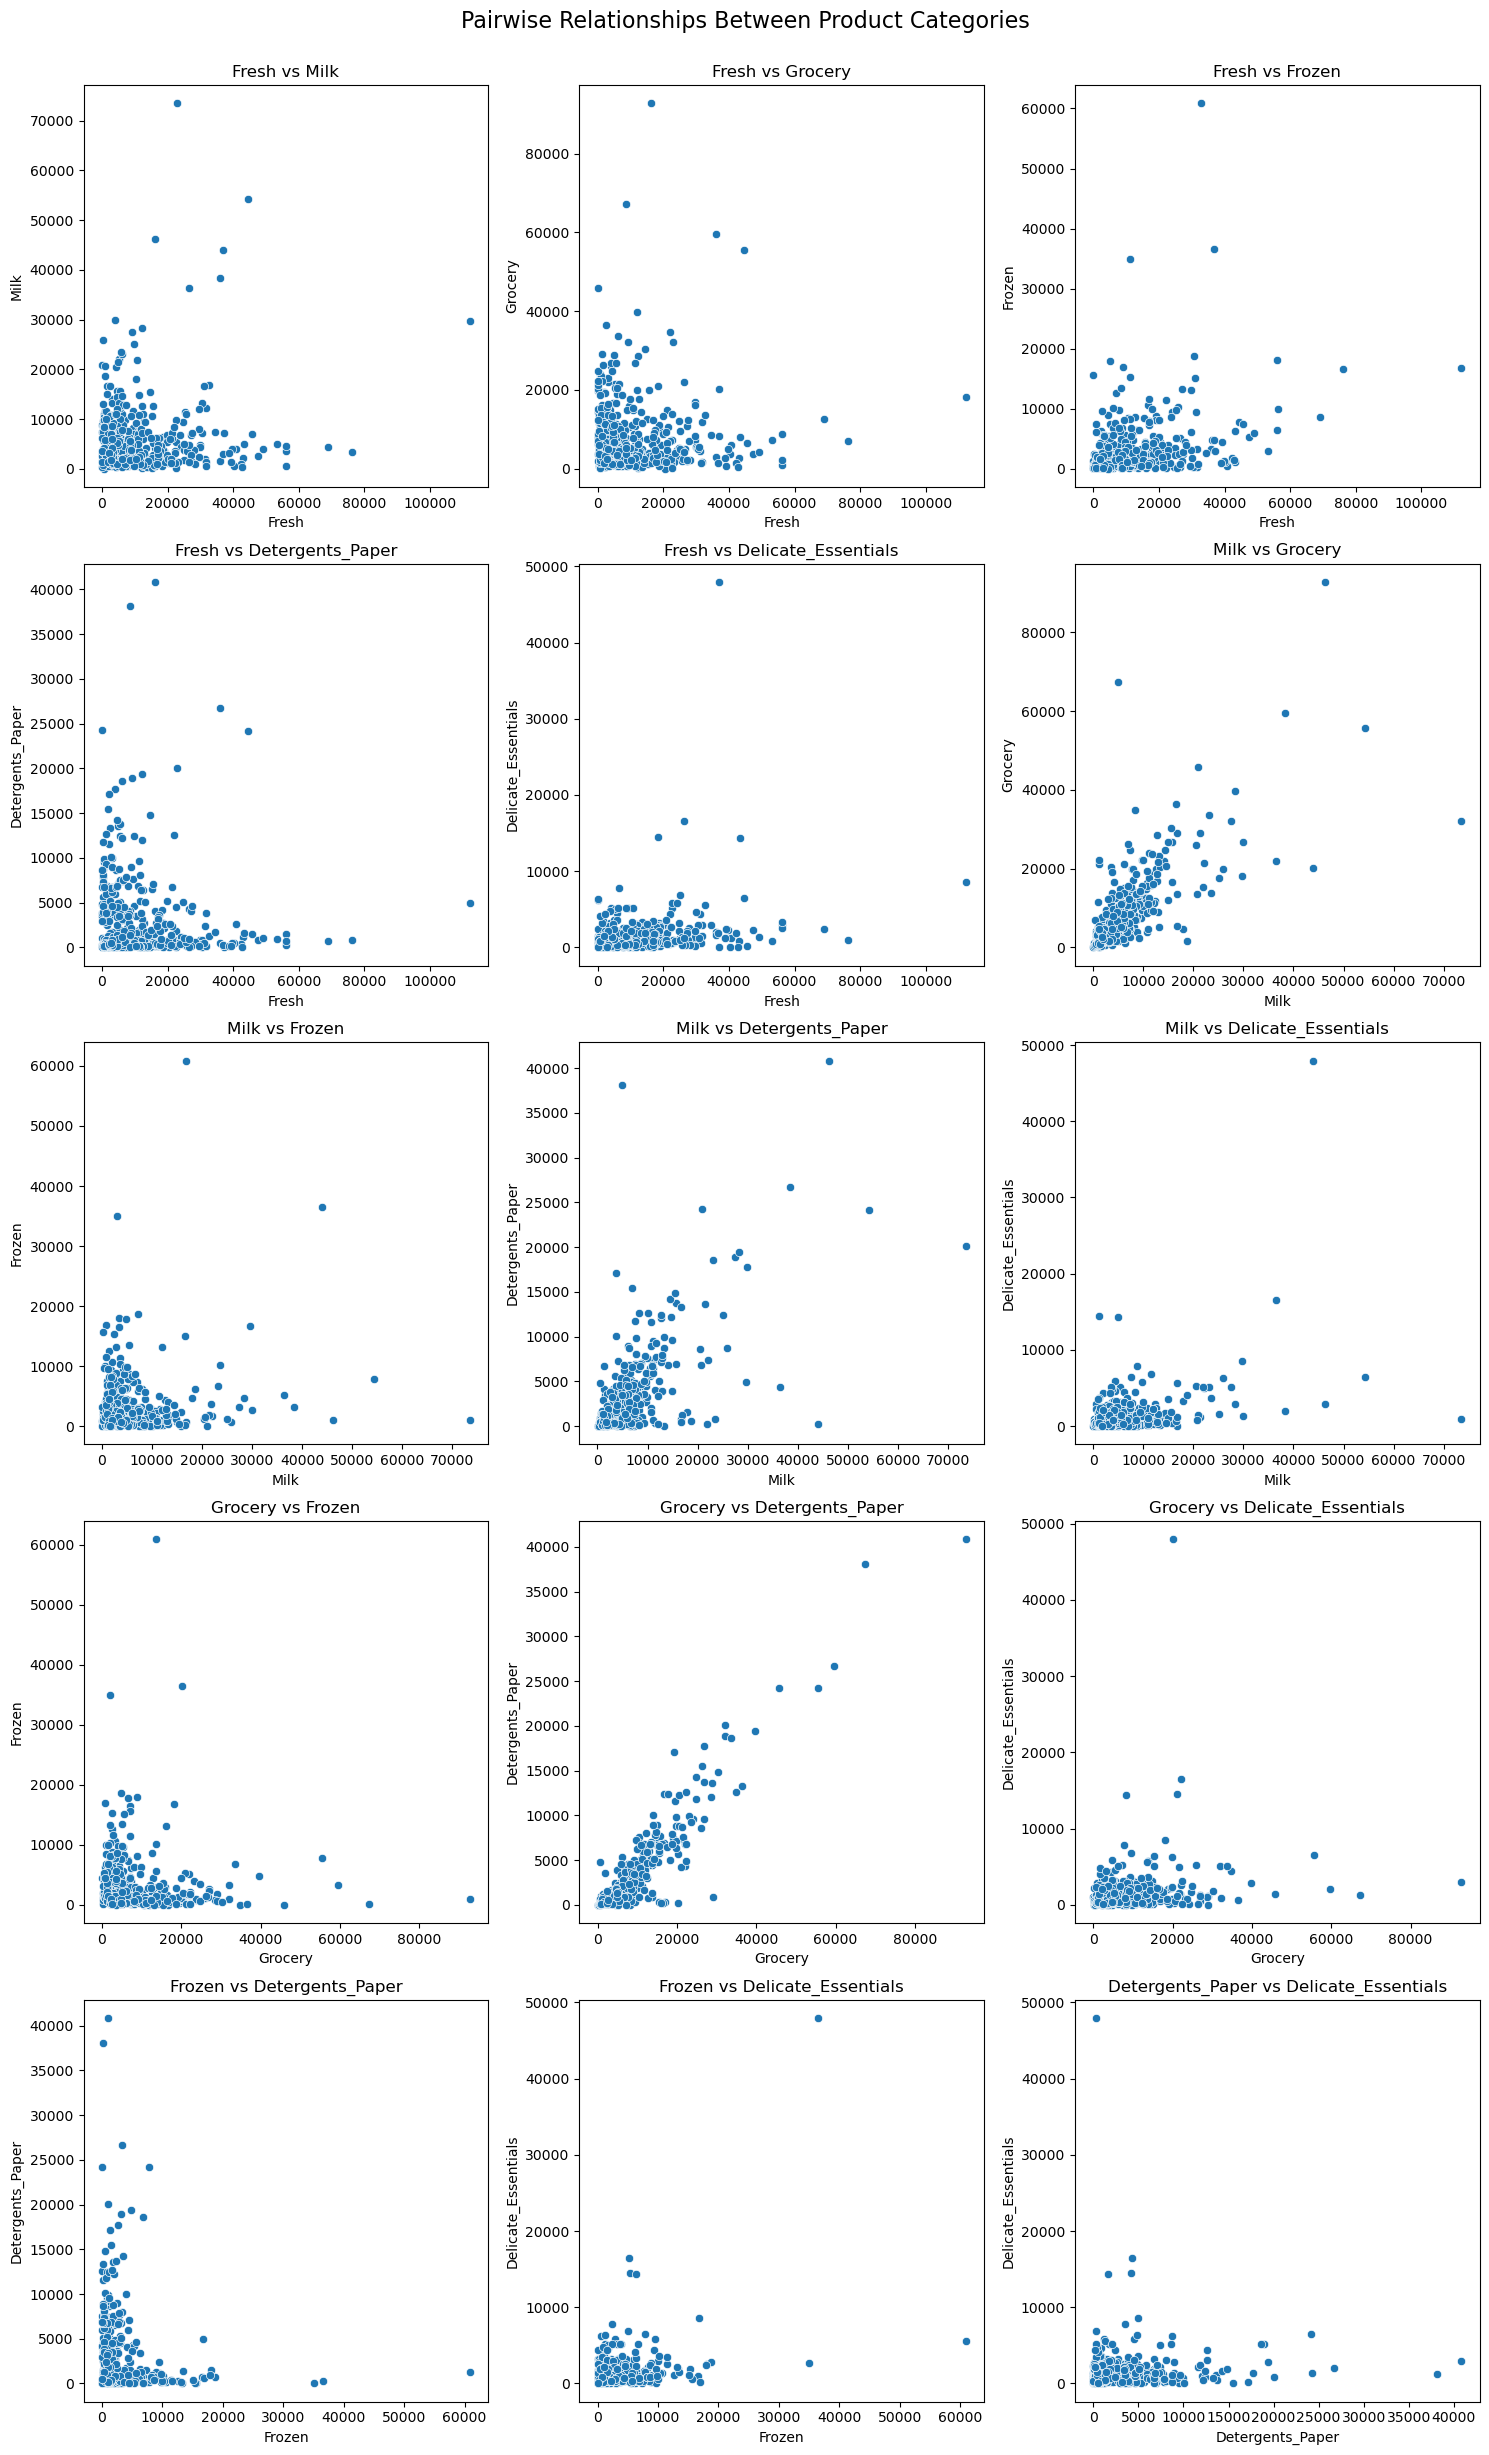

In [40]:
# this will give us the total unique product pairs
num_plots = sum(range(len(products)))

# columns for the subplots
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle('Pairwise Relationships Between Product Categories', fontsize=16)

# here we are using two for loops as we want to plot pairwise relationships between product categories
plot_idx = 0
for i in range(len(products)):
    for j in range(i+1, len(products)):
        row, col = divmod(plot_idx, num_cols)
        sns.scatterplot(x=df[products[i]], y=df[products[j]], ax=axes[row, col])
        axes[row, col].set_title(f'{products[i]} vs {products[j]}')
        axes[row, col].set_xlabel(products[i])
        axes[row, col].set_ylabel(products[j])
        plot_idx += 1

# Hiding unused subplots
for idx in range(plot_idx, num_rows * num_cols):
    fig.delaxes(axes.flatten()[idx])

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## 4. Conclusion

**What is the category-wise spending for the retail and horeca channels?**

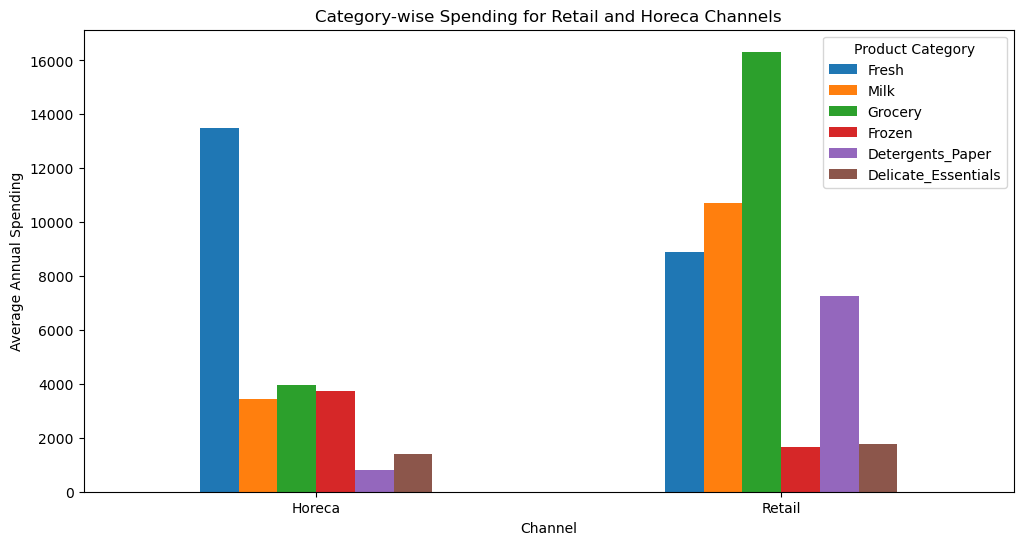

In [43]:
channel_average = df.groupby('Channel')[products].mean().reset_index()
channel_average.plot(x='Channel', kind='bar', stacked=False, figsize=(12, 6))
plt.title('Category-wise Spending for Retail and Horeca Channels')
plt.xlabel('Channel')
plt.ylabel('Average Annual Spending')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.show()

As can be seen from the above plot:
- Horeca clients spend the most on Fresh products as compared to retail clients.
- Retailers fit under the high-spending category for Groceries.
- The spending on Detergents and paper products is high amongst the retailers as compared to Horeca clients.
- Frozen products and delicate essentials products have relatively low spending in both the channels.

**What is the category-wise spending across the different regions?**

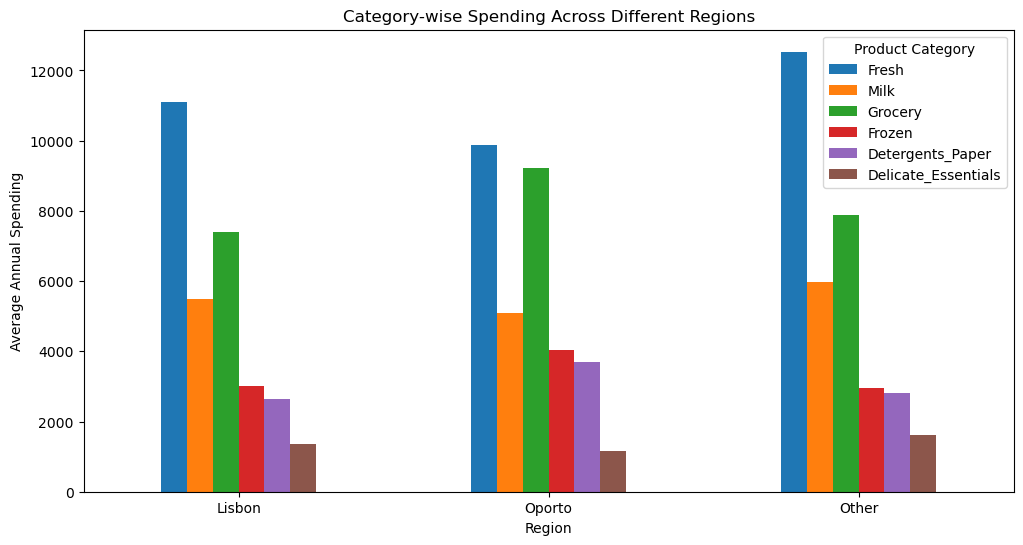

In [46]:
region_average = df.groupby('Region')[products].mean().reset_index()
region_average.plot(x='Region', kind='bar', stacked=False, figsize=(12, 6))
plt.title('Category-wise Spending Across Different Regions')
plt.xlabel('Region')
plt.ylabel('Average Annual Spending')
plt.xticks(rotation=0)
plt.legend(title='Product Category')
plt.show()

As can be seen from the plot above:
- Fresh products have the highest spending in all the regions, followed by groceries.
- The spending for frozen products, and delicate essentials varies slightly across regions. However, it is significantly lower as compared to other product categories.
- If one observes closely, spending patterns are more or less stable across regions. This can help in creating a uniform marketing strategy.

**What is the average annual spending for each category?**

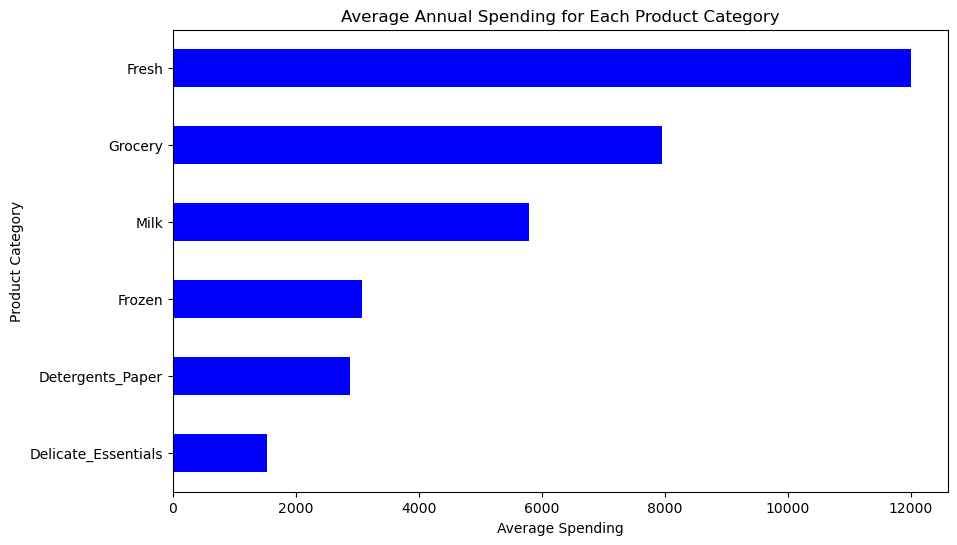

In [49]:
average_spending = df[products].mean().sort_values()
average_spending.plot(kind='barh', figsize=(10, 6), color='blue')
plt.title('Average Annual Spending for Each Product Category')
plt.xlabel('Average Spending')
plt.ylabel('Product Category')
plt.show()

As can be seen from the above plot:
- The average annual spending is highest for fresh products followed by groceries and milk.
- As stated above, the average annual spending on frozen products, detergents and paper products, and delicate essential products is significantly low as compared to other product categories.
- Markteting efforts can be more pronounced for high-revenue categories. At the same time, steps can be taken to boost the sales of lower revenue categories.

## 5. Summary

**Key findings:**  
Through this whole analysis, i.e., the outlier analysis, Data Analysis section, and the EDA on the data, I was able to to identify key trends and patterns for the client spending across different product categories for different regions and channels. The main goal of this study was to help the Wholesale distribution business understand the market segmentation, popular product categories per region per channel to help in targetted marketing and inventory optimization. This can help in enhancing sales for the business. Given below are the most significant trends derived form the analysis:
- Spending across fresh products is the highest across all regions and cutomer segments, while the spending on delicate essentials is the least.
- Retailers spend a great deal on grocery products, while Horeca clients pritoritze fresh products. This makes sense, as retailers can stock groceries for resale through their stores, while restaurants, caterers prefer fresh ingredients to ensure high food quality.
- The spending on milk and detergents and paper products is highly corelated with Groceries, indicating that customers who purchase groceries also purchase milk products and detergents and paper products. This insight is useful as the business can sell these products by bundling them.
- The primary revenue drivers are fresh products, milk products and grocery and hence, more attention can be paid towards marketing those. These can strengthen the performance of those categories even better, generating huge amount of revenue with limited marketing spend.
- Spending patterns remain uniform across regions. This suggests that marketing strategies can be formed without taking region into consideration.
- It could be seen from the outlier analysis, that Horeca clients showed high spending variability for fresh and frozen products, making inventory planning challenging, while spending by retailers is more consistent.
- Outliers can be more profoundly seen for the 'Other' region across all the product categories, indicating that certain areas have high volume buyers. This insight is useful from inventory management point of view.

**Plots and their significance:**  
- Boxplots were used to analyze spending variability across product categories per region per channel. This was also used to detect outliers. It helped in identifying bulk buyers and regular customers.
- Histograms revealed that the spending distributions were mostly left-skewed, that is majority of the customers are small-to-medium spenders and there are a few high spenders. But they contribute significantly to the revenue.
- Correlation heatmaps suggested strong correlation between Grocery and Detergents_Paper and Milk and Grocery, thereby aiding in market basket analysis.
- Pairwise scatter plots clearly showed the market segmentation, ie., high and low spenders across product categories.
- Bar plots of category-wise spending by channel and region was useful in comparing the spending behaviour of Horeca and Retail categories and how this varies geographically.

**Future Work and Potential datasets:**  
This analysis did provide useful insights, but future research can focus on the following for a comprehensive analysis which can help achieve a sustainable Wholesale business:
- Applying clustering algortihms to better understand the market segmentation
- Using data from external sources like weather data, economy data to understand how external factors influence the wholesale business
- Temporal data can be used to identify seasonal trends and patterns
- Use of regression algortihms to implement predictive modeling, to aid demand forecasting and inventory optimization.

## References

- [UC Irvine Machine Learning Repository: Wholesale Customers Dataset](https://archive.ics.uci.edu/dataset/292/wholesale+customers)
- [Pandas Dataframes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
- [Matplotlib](https://matplotlib.org/stable/index.html)
- [Seaborn](https://seaborn.pydata.org/)